In [1]:
import os
import datetime
import sys
from pathlib import Path
import torch
import wandb
from config import get_config
from data_initialize import data_initialize
from model import MyNet
from train import train
from evaluate import validate, evaluate_model
from figure import make_figures
from torch import nn, optim

def run_20datasets_experiment(dataset_name, train_model=False):
    """
    Run 20datasets evaluation: Load data, optionally train, and generate figures.

    :param dataset_name: Name of the dataset to evaluate.
    :param train_model: If True, train the model; otherwise, load and evaluate.
    """
    config = get_config()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load dataset
    eval_type = "20datasets"
    data_loaders = data_initialize(eval_type, dataset_name=dataset_name, batch_size=config["batch_size"])
    dataloader_train, dataloader_val, dataloader_test, x_shape = data_loaders

    # Initialize model
    model = MyNet(x_shape=x_shape, config=config).to(device)

    # Define loss function and optimizer
    loss_function = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=config["learning_rate"])

    pretrained_model_path = f"../saved_model/20_datasets_evaluation/{dataset_name}/best.pth"
    today = datetime.datetime.now().strftime("%m%d")
    new_model_path = f"../saved_model/20_datasets_evaluation/{dataset_name}_{today}/best.pth"
    Path(new_model_path.rsplit('/', 1)[0]).mkdir(parents=True, exist_ok=True)
    model_path_to_use = pretrained_model_path if not train_model and os.path.exists(pretrained_model_path) else new_model_path


    if train_model:
        wandb.init(config=config, project="20datasets_evaluation", entity="alirezak2", name=dataset_name, mode="online")

        # Define loss function and optimizer
        loss_function = nn.L1Loss()
        optimizer = optim.Adam(model.parameters(), lr=config["learning_rate"])

        print("Training new model...")

        # Train model
        best_loss = float("inf")
        best_model_state = None

        for epoch in range(config["epochs"]):
            loss_train = train(model, dataloader_train, loss_function, optimizer, epoch, device, config["clipping_size"])
            loss_valid, corr_valid, _, _ = validate(model, dataloader_val, loss_function, device)

            print(f"Epoch {epoch}: Train Loss {loss_train:.4f}, Val Loss {loss_valid:.4f}, Correlation {corr_valid:.4f}")

            if loss_valid < best_loss:
                best_loss = loss_valid
                best_model_state = model.state_dict()

            wandb.log({"Train Loss": loss_train, "Validation Loss": loss_valid, "Validation Correlation": corr_valid})

        # Save newly trained model with timestamp
        torch.save(best_model_state, new_model_path)
        print(f"Model saved as: {new_model_path}")
        model_path_to_use = new_model_path  # Ensure correct path is passed to figures

        wandb.finish()  # Close wandb session

    else:
        if os.path.exists(pretrained_model_path):
            print(f"Loading pre-trained model from: {pretrained_model_path}")
            model.load_state_dict(torch.load(pretrained_model_path, map_location=device))
        else:
            raise FileNotFoundError(f"Pre-trained model not found for {dataset_name}! Enable training to generate a model.")


    # evaluate_model(model, dataloader_test, None, loss_function, device, model_path_to_use, eval_type, save_results=False)
    make_figures(model, model_path_to_use, loss_function, dataloader_test, eval_type, None, save_results=False)


{'chemical_features': (0, 1), 'diamino_chemical_features': (1, 2), 'diamino_atoms': (2, 8), 'atoms': (8, 14), 'sequence_metadata': (14, 21), 'one_hot': (21, 41)}


Loading pre-trained model from: ../saved_model/20_datasets_evaluation/swath/best.pth
Test Loss: 165.9060, Correlation: 0.9961

Test Set Loss: 165.9060, Correlation: 0.9961



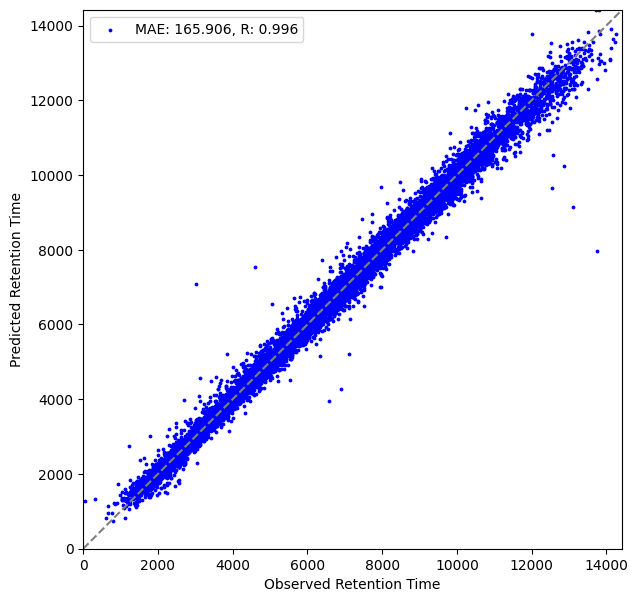

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/scx/best.pth
Test Loss: 0.2943, Correlation: 0.9976

Test Set Loss: 0.2943, Correlation: 0.9976



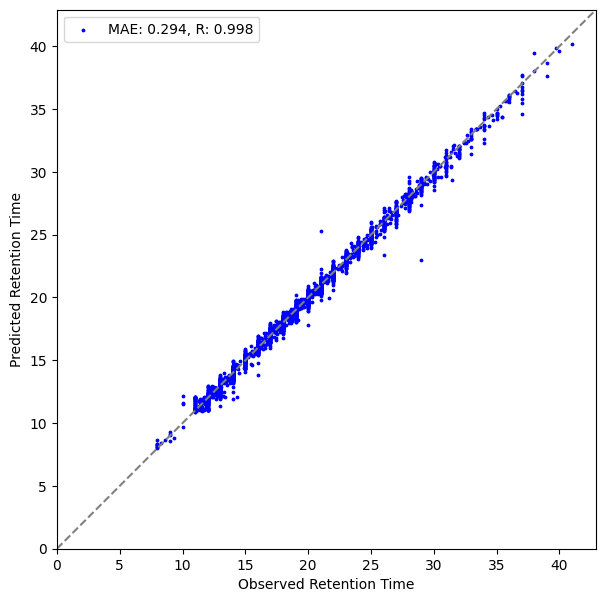

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/atlantis/best.pth
Test Loss: 0.4990, Correlation: 0.9923

Test Set Loss: 0.4990, Correlation: 0.9923



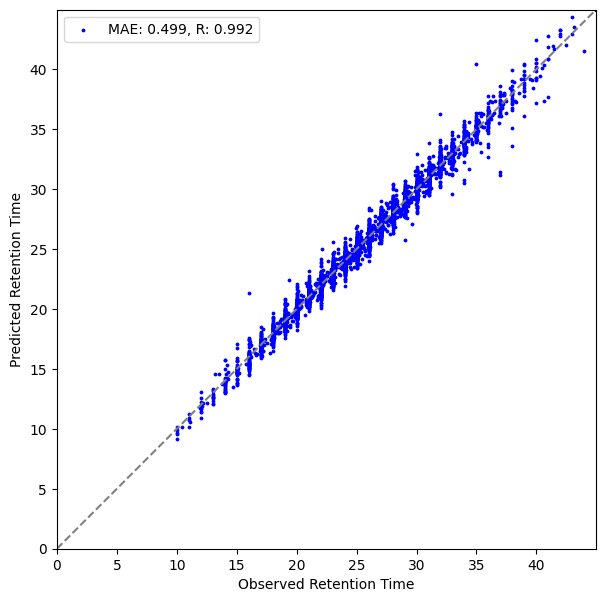

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/yeast2h/best.pth
Test Loss: 155.8286, Correlation: 0.9775

Test Set Loss: 155.8286, Correlation: 0.9775



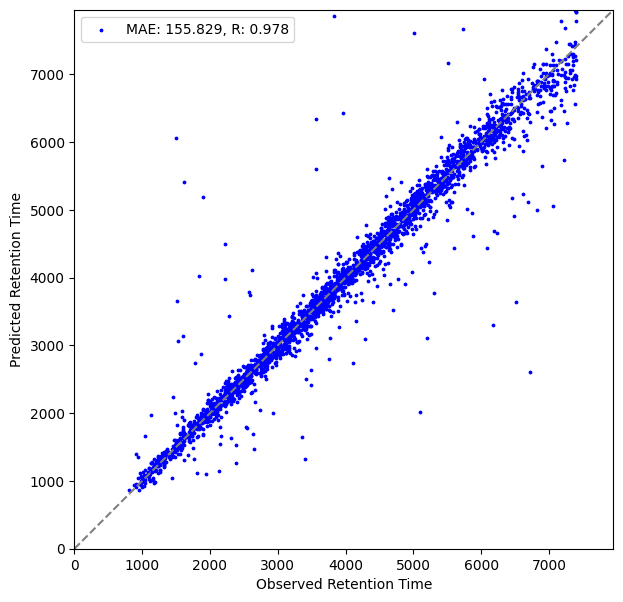

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/helahf/best.pth
Test Loss: 21.5550, Correlation: 0.9827

Test Set Loss: 21.5550, Correlation: 0.9827



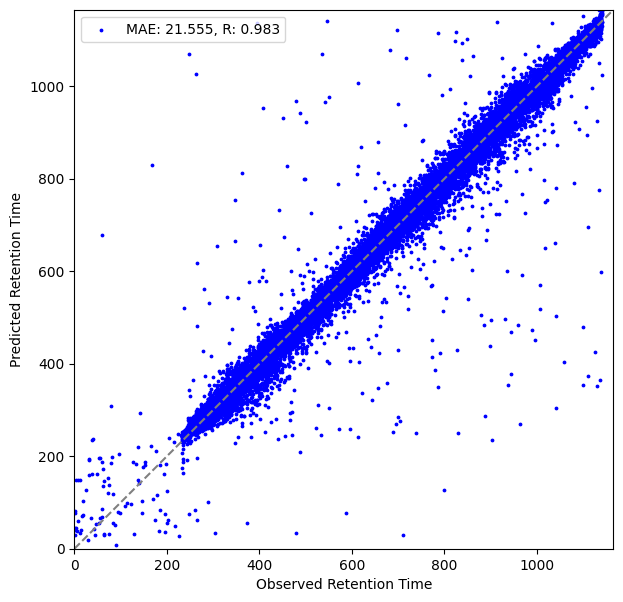

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/proteometoolsptm/best.pth
Test Loss: 1.2771, Correlation: 0.9809

Test Set Loss: 1.2771, Correlation: 0.9809



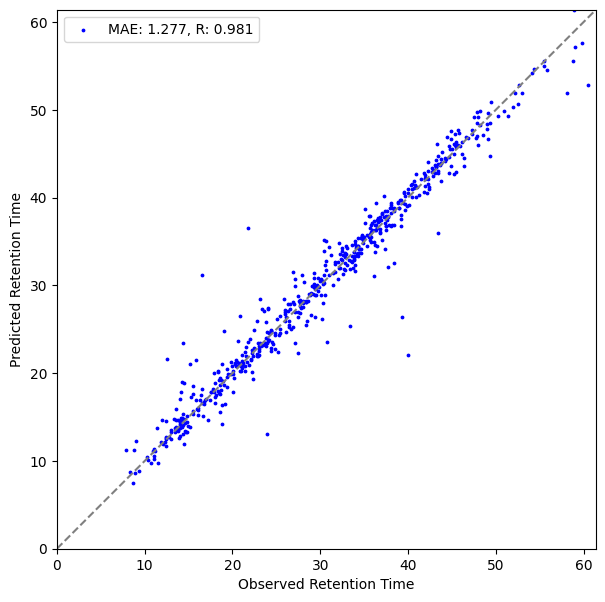

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/arabidopsis/best.pth
Test Loss: 307.2813, Correlation: 0.9501

Test Set Loss: 307.2813, Correlation: 0.9501



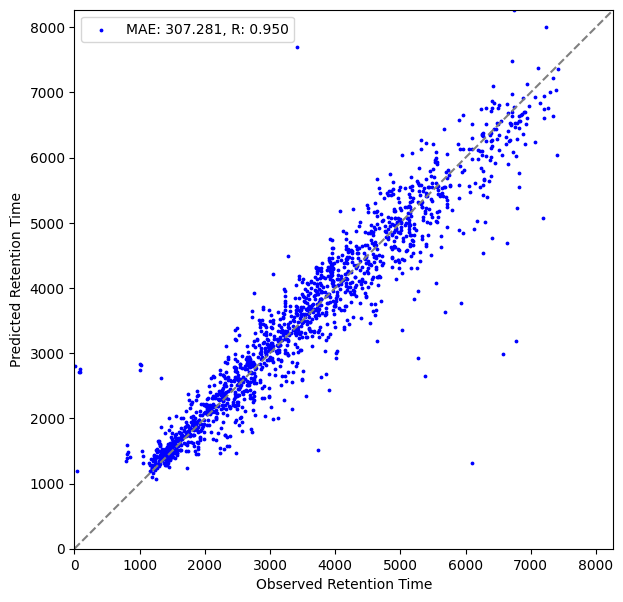

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/lunasilica/best.pth
Test Loss: 0.5276, Correlation: 0.9917

Test Set Loss: 0.5276, Correlation: 0.9917



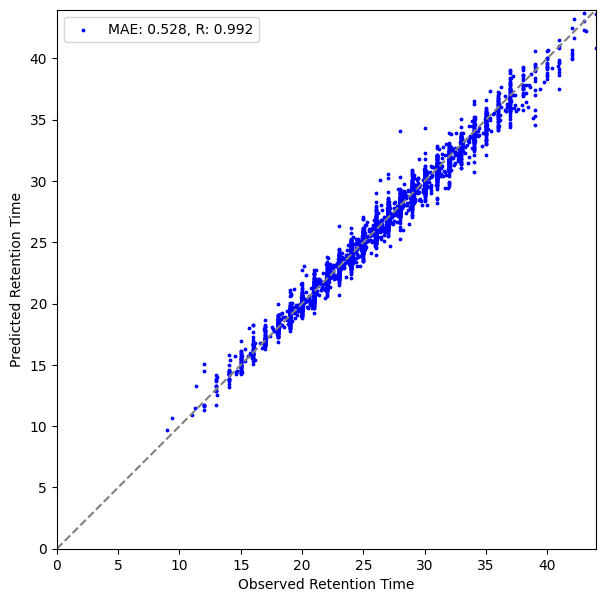

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/xbridge/best.pth
Test Loss: 0.5388, Correlation: 0.9949

Test Set Loss: 0.5388, Correlation: 0.9949



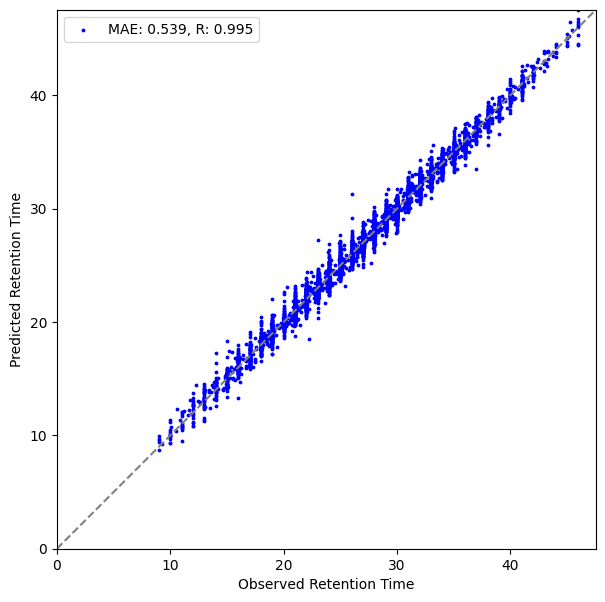

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/pancreas/best.pth
Test Loss: 153.6116, Correlation: 0.9699

Test Set Loss: 153.6116, Correlation: 0.9699



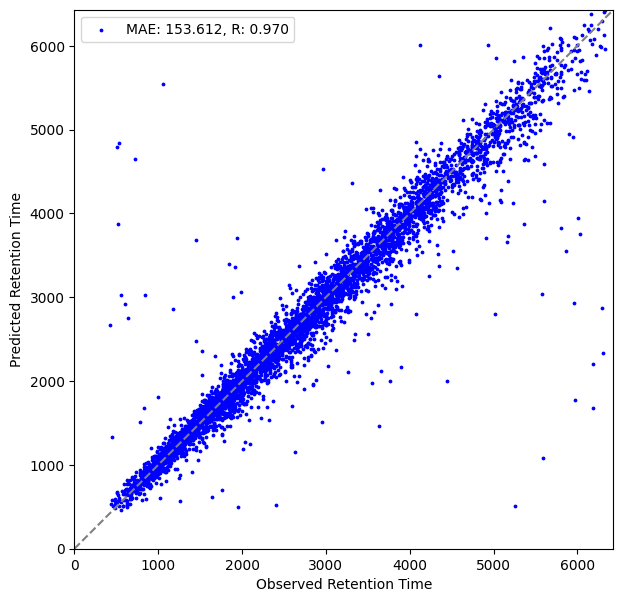

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/plasma2h/best.pth
Test Loss: 230.6443, Correlation: 0.9663

Test Set Loss: 230.6443, Correlation: 0.9663



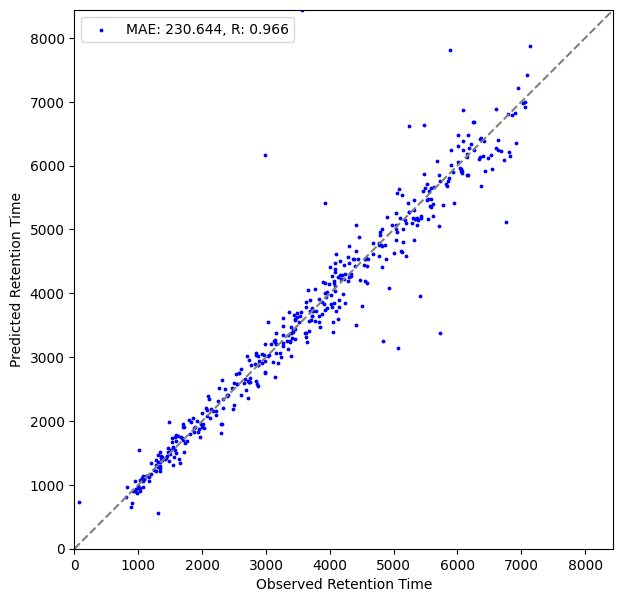

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/heladeeprt/best.pth
Test Loss: 180.6525, Correlation: 0.9696

Test Set Loss: 180.6525, Correlation: 0.9696



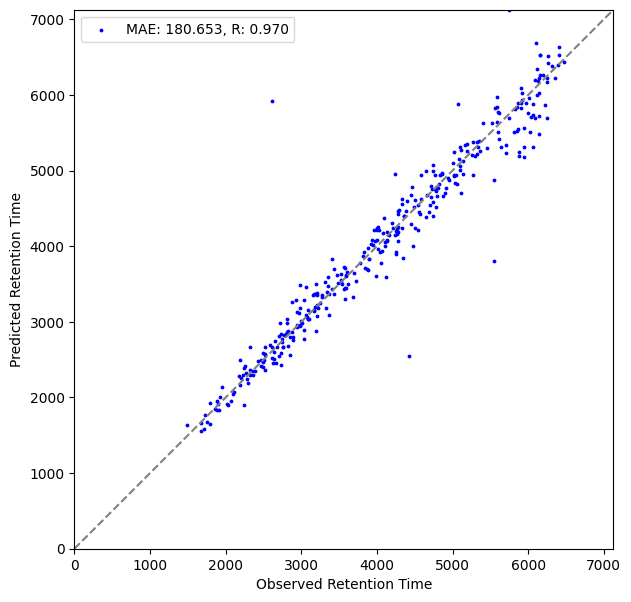

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/hela1h/best.pth
Test Loss: 80.3808, Correlation: 0.9856

Test Set Loss: 80.3808, Correlation: 0.9856



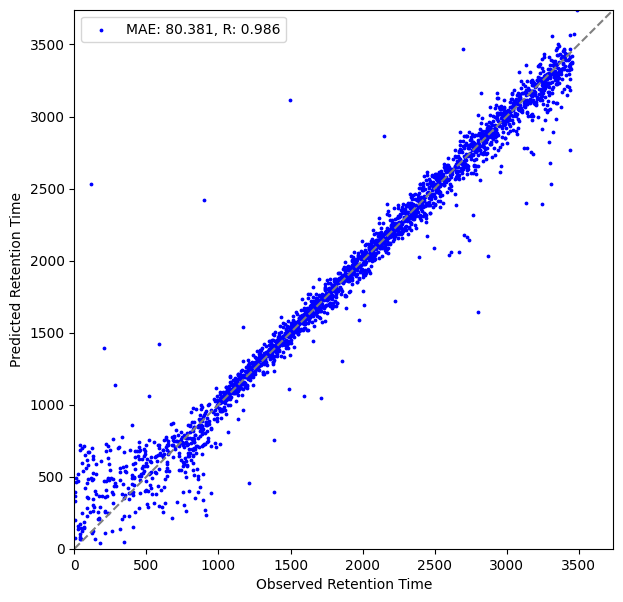

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/yeastdeeprt/best.pth
Test Loss: 299.1883, Correlation: 0.9938

Test Set Loss: 299.1883, Correlation: 0.9938



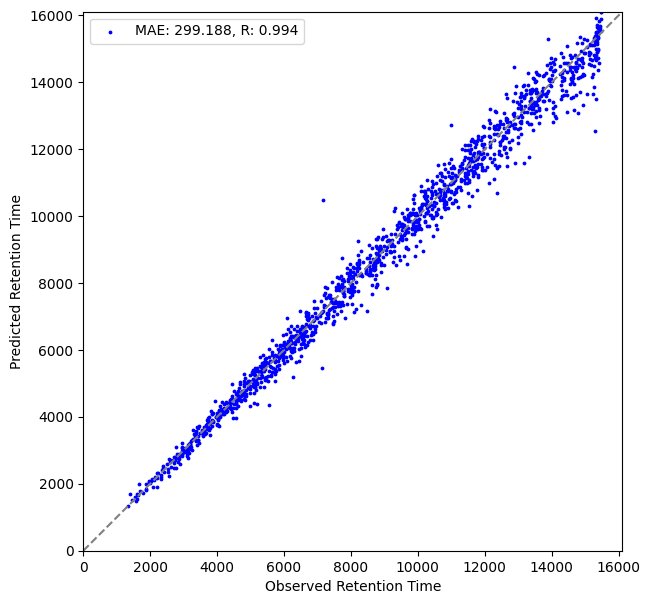

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/proteometools/best.pth
Test Loss: 27.3377, Correlation: 0.9936

Test Set Loss: 27.3377, Correlation: 0.9936



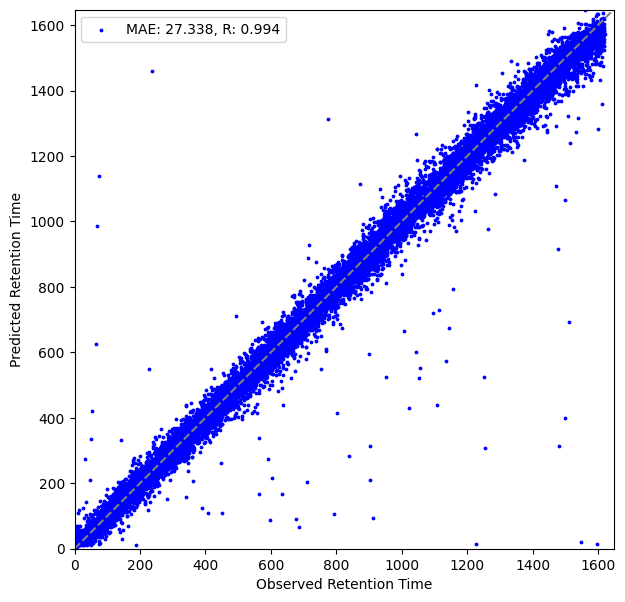

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/hela2h/best.pth
Test Loss: 106.2807, Correlation: 0.9889

Test Set Loss: 106.2807, Correlation: 0.9889



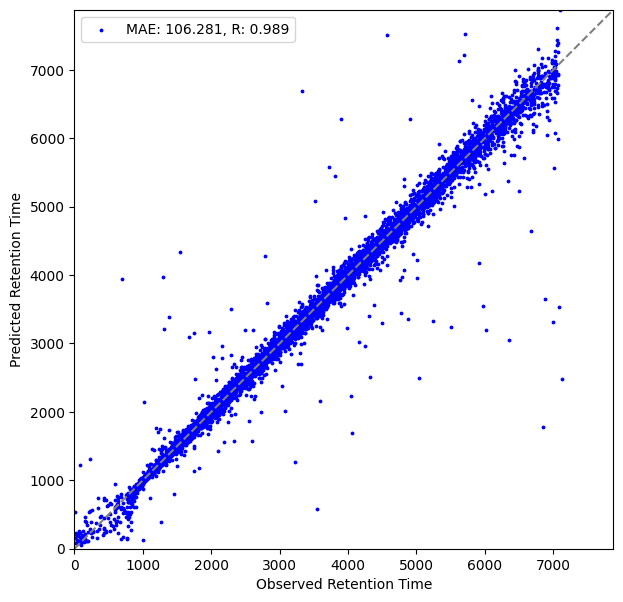

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/diahf/best.pth
Test Loss: 2.8085, Correlation: 0.9930

Test Set Loss: 2.8085, Correlation: 0.9930



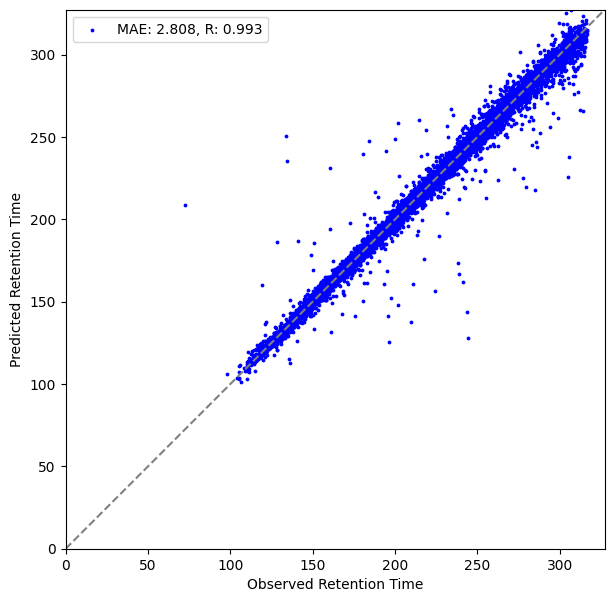

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/lunahilic/best.pth
Test Loss: 0.5664, Correlation: 0.9933

Test Set Loss: 0.5664, Correlation: 0.9933



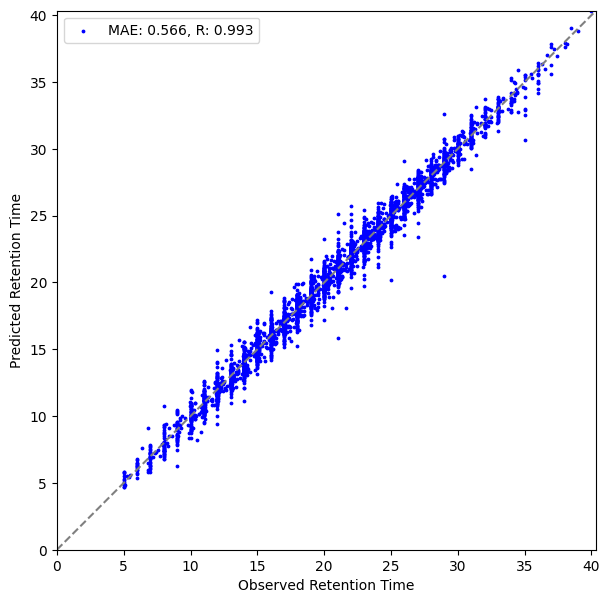

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/plasma1h/best.pth
Test Loss: 189.4008, Correlation: 0.9411

Test Set Loss: 189.4008, Correlation: 0.9411



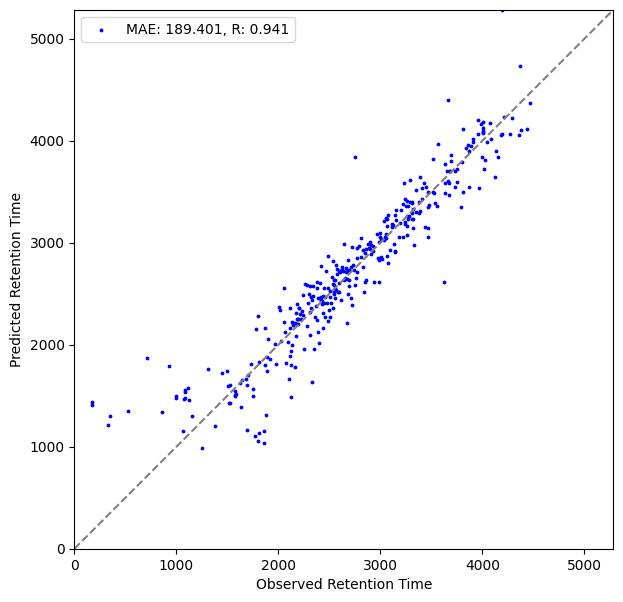

Loading pre-trained model from: ../saved_model/20_datasets_evaluation/yeast1h/best.pth
Test Loss: 79.5280, Correlation: 0.9728

Test Set Loss: 79.5280, Correlation: 0.9728



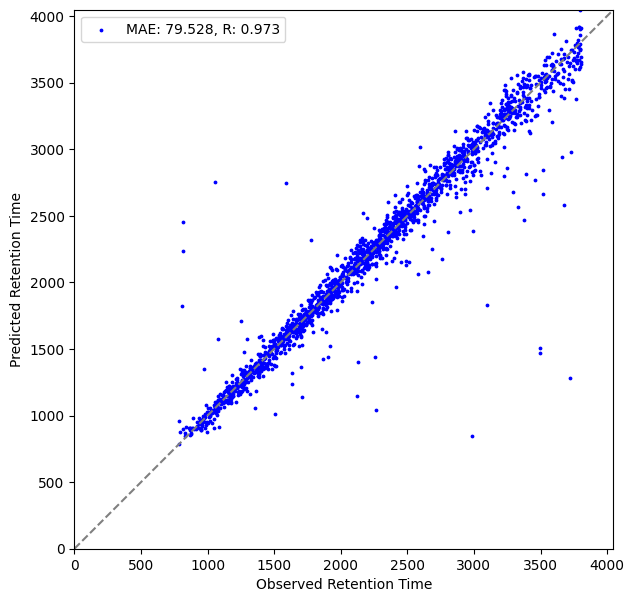

In [2]:
# Dictionary of datasets
dataset_dict = {
    "swath": [0, 14556], "scx": [7, 46], 'atlantis': [9, 46], "yeast2h": [762, 7664], "helahf": [0, 1140],
    "proteometoolsptm": [7, 61], "arabidopsis": [0, 7893], "lunasilica": [9, 46], "xbridge": [9, 46],
    "pancreas": [232, 6459], "plasma2h": [2, 7194], "heladeeprt": [1493, 6494], "hela1h": [0, 3581],
    "yeastdeeprt": [852, 15759], "proteometools": [0, 1620], "hela2h": [1, 7161], "diahf": [0, 317],
    "lunahilic": [5, 42], "plasma1h": [0, 4480], "yeast1h": [753, 4109]
}

# 🚀 **Run all datasets**
for dataset in dataset_dict.keys():
    run_20datasets_experiment(dataset_name=dataset, train_model=False)  # Set train_model=True to train a new model
